In [1]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, reset_output, curdoc
from bokeh.embed import file_html
from bokeh.models import LabelSet, Label, ColumnDataSource, FactorRange, HoverTool
from bokeh.models.annotations import Title
from bokeh.transform import factor_cmap
import bokeh.plotting as bp
from bokeh.layouts import row, column,layout, gridplot
from bokeh.models.widgets import Slider, TextInput
from bokeh.transform import cumsum
from bokeh.palettes import Category10
import nltk
reset_output()
output_notebook()

Loading BokehJS ...

- Mediante el análisis visual, caracterice las condiciones en toda la ciudad y recomiende cómo deben asignarse los recursos a las 5 horas y 30 horas después del terremoto. Incluya evidencia de los datos para apoyar estas recomendaciones. Considere cómo asignar recursos tales como cuadrillas de caminos, cuadrillas de reparación de alcantarillado, equipos de energía y rescate.

In [2]:
data = pd.read_csv("./YInt.csv",index_col=0, parse_dates=True, infer_datetime_format=True)
data = data.dropna()
data.head()

,location,account,message
time,,,
2020-04-06 00:00:00,Weston,Opportunities2,"Take advantheeseage of theesehese One, theeser..."
2020-04-06 00:00:00,Southton,LazyBCouch,@WatchesThomasBird fork it you're back in he s...
2020-04-06 00:02:00,Southton,______3333_____,Two month left bedoreefore you loose this vibe...
2020-04-06 00:04:00,Broadview,RasoHorse49,"billeeeeer, i miss ytouou !"
2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,You obviously need to use rumble! #rumble #toW...


In [15]:
pd.unique(data.index.day)

array([ 6,  7,  8,  9, 10])

In [16]:
pd.unique(data.location.values)

array(['Weston', 'Southton', 'Broadview', 'West Parton', 'Old Town',
       'Terrapin Springs', 'Downtown', 'Southwest', 'Scenic Vista',
       'East Parton', 'Cheddarford', 'Palace Hills', 'Safe Town',
       'Easton', 'Chapparal', 'Northwest', 'Oak Willow', 'Pepper Mill',
       'Wilson Forest', 'UNKNOWN', '<Location with-held due to contract>'],
      dtype=object)

In [17]:
sum(data.location == "UNKNOWN"), sum(data.location == "<Location with-held due to contract>")

(31, 95)

In [18]:
data.shape

(41930, 3)

In [41]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, reset_output, curdoc
from bokeh.embed import file_html
from bokeh.models import LabelSet, Label, ColumnDataSource, FactorRange, HoverTool
from bokeh.models.annotations import Title
from bokeh.transform import factor_cmap
import bokeh.plotting as bp
from bokeh.layouts import row, column,layout, gridplot
from bokeh.models.widgets import Slider, TextInput, RangeSlider, Select
from bokeh.transform import cumsum
from bokeh.palettes import Category10, Category20
import nltk

def histogram(df, col, bins=30):
    edges = []
    hist = []
    largura = max(df.index) - min(df.index)
    h = largura/bins
    aux = min(df.index)
    for i in range(100):
        edges.append(aux)
        hist.append(df.loc[aux:aux + h].count()[col])
        aux = aux + h
    edges.append(aux)
    
    return edges, hist

#Se cargan los datos
data = pd.read_csv("YInt.csv",index_col=0, parse_dates=True, infer_datetime_format=True)
#Distribução geral dos dados
p1 = figure(plot_height=300, plot_width=800, title="Quantidade de tweets por intervalo de tempo para todos os bairros",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime')
p1.xaxis.axis_label = "dias registrados"
p1.yaxis.axis_label = "quantidade de tweets"
#quantidade de tweets por bairro
p2 = figure(plot_height=300, plot_width=300, title="Quantidade de tweets por bairro",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_range=(-3.5,3.5), y_range=(-3.5,3.5))
#palavras mais faladas
p3 = figure(plot_height=300, plot_width=800, title="Quantidade de tweets por bairro",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime', x_range=p1.x_range)
p3.xaxis.axis_label = "dias registrados"
p3.yaxis.axis_label = "quantidade de tweets"
#hashtag mais frequentes
p4 = figure(plot_height=300, plot_width=300, title="Quantidade de usuarios por bairro",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_range=(-3.5,3.5), y_range=(-3.5,3.5))
names = ["Palace Hills", "Northwest", "Old Town", "Safe Town", "Southwest", "Downtown",
         "Wilson Forest", "Scenic Vista", "Broadview", "Chapparal", "Terrapin Springs",
         "Pepper Mill", "Cheddarford", "Easton", "Weston", "Southton", "Oak Willow",
         "East Parton", "West Parton"]
#Barras de interacción
#s_day = RangeSlider(title="intervalo de dias", start=6, end=10, value=(6, 10), step=1)
#s_range = RangeSlider(title="intervalo de horas", start=0, end=24, value=(0,24), step=1)
select_vec = Select(title="Bairro:", value="Palace Hills", options=names)
#Gráfico 1
edges1, hist1 = histogram(data, "location", bins=100)
source1 = ColumnDataSource(dict(hist=hist1,left=edges1[:-1], right=edges1[1:]))
p1.quad(top="hist", bottom=0, left="left", right="right", color = "blue",
            line_color="white", alpha=0.7, source=source1, legend="tweets")
p1.hover.tooltips = [("data inicial", "@left{%F %T}"),
                    ("data final", "@right{%F %T}"),
                    ("quantidade", "@hist")]
p1.hover.formatters = {'left': 'datetime', 'right': 'datetime'}
p1.hover.mode = "vline"

#Gráfico 2
edges2, hist2 = histogram(data.loc[data.location=="Palace Hills"], "location", bins=100)
source2 = ColumnDataSource(dict(hist=hist2,left=edges2[:-1], right=edges2[1:]))
p3.quad(top="hist", bottom=0, left="left", right="right", color = "red",
            line_color="white", alpha=0.7, source=source2, legend="tweets")
p3.hover.tooltips = [("data inicial", "@left{%F %T}"),
                    ("data final", "@right{%F %T}"),
                    ("quantidade", "@hist")]
p3.hover.formatters = {'left': 'datetime', 'right': 'datetime'}
p3.hover.mode = "vline"

#Gráfico 3
data_aux = data.copy()
data_aux.drop(["account","message"], axis=1)
data_aux["values"] = 1
data_aux = data_aux.groupby("location").sum()
data_aux = data_aux.drop(["UNKNOWN", "<Location with-held due to contract>"])
source3 = ColumnDataSource(dict(data_aux, angle=data_aux["values"]/(data_aux["values"]).sum() * 2*np.pi,
                                  color=Category20[19], location=data_aux.index))
p2.wedge(x=0, y=0, radius=3,start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
         line_color="black", fill_color='color', source=source3)
p2.hover.tooltips = [("bairro", "@location"),
                     ("quantidade", "@values")]

#Gráfico 4
data_aux2 = data.copy()
data_aux2.drop("message", axis=1)
data_aux2["values"] = 1
data_aux2 = data_aux2.groupby(["location", "account"], as_index=False).sum()
data_aux2 = data_aux2.set_index("location")
data_aux2 = data_aux2.drop(["UNKNOWN", "<Location with-held due to contract>"])
data_aux2["values"] = 1
data_aux2 = data_aux2.groupby("location").sum()
source4 = ColumnDataSource(dict(data_aux2, angle=data_aux["values"]/(data_aux["values"]).sum() * 2*np.pi,
                               color=Category20[19], location=data_aux2.index))
p4.wedge(x=0, y=0, radius=3,start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
         line_color="black", fill_color='color', source=source4)
p4.hover.tooltips = [("bairro", "@location"),
                     ("quantidade", "@values")]

def update_data(attrname, old, new):

    #Para obtener los valores actuales
    #day_val = s_day.value
    vec_val = select_vec.value
    #hr_val = s_range.value
    #Actualizar grafico 3
    edges2, hist2 = histogram(data.loc[data.location==vec_val], "location", bins=100)
    source2.data = dict(hist=hist2,left=edges2[:-1], right=edges2[1:])
    
    
#Para hacer las actualizaciones
for w in [select_vec]:
    w.on_change('value', update_data)

col_1 = column([select_vec], width=200)
col_2 = column([p1, p3])
col_3 = column([p2, p4])

curdoc().add_root(row(gridplot([[col_1, col_2, col_3]]), width=400))

#show(p2)

In [3]:
def histogram(df, col, bins=30):
    """
    Función para generar los intervalos y la cantidad de datos por intervalo
    
    Parámetros:
    -----------
    df: dataFrame de entrada, indice debe ser de tipo datetime
    col: columna guia para contar los intervalos
    bins: cantidad de intervalos
    
    Retorna:
    ---------
    hist: valores del histograma, cantidad de datos por intervalo.
    edges: Intervalos del histograma.
    """
    edges = []
    hist = []
    largura = max(df.index) - min(df.index)
    h = largura/bins
    aux = min(df.index)
    for i in range(bins):
        edges.append(aux)
        hist.append(df.loc[aux:aux + h].count()[col])
        aux = aux + h
    edges.append(aux)
    
    return edges, hist

In [4]:
data.iloc[0:100]

,location,account,message
time,,,
2020-04-06 00:00:00,Weston,Opportunities2,"Take advantheeseage of theesehese One, theeser..."
2020-04-06 00:00:00,Southton,LazyBCouch,@WatchesThomasBird fork it you're back in he s...
2020-04-06 00:02:00,Southton,______3333_____,Two month left bedoreefore you loose this vibe...
2020-04-06 00:04:00,Broadview,RasoHorse49,"billeeeeer, i miss ytouou !"
2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,You obviously need to use rumble! #rumble #toW...
2020-04-06 00:11:00,Old Town,Moore1961,I hate all the fawning apple-johns lying aroun...
2020-04-06 00:11:00,Terrapin Springs,AttentativeKHouse,Theres like 10 min misconduct.
2020-04-06 00:12:00,Downtown,LovesCarolBear,I hate all the shard-borne maggot-pies lying a...
2020-04-06 00:13:00,Broadview,Syndicated4,Grasp onto this moving opportunity!


In [5]:
edges, hist = histogram(data,"location", bins=1000)

In [7]:
p1 = figure(plot_height=400, plot_width=800, title="Quantidade de tweets por intervalo de tempo",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime')

p1.xaxis.axis_label = "dias registrados"
p1.yaxis.axis_label = "quantidade de tweets"
source1 = ColumnDataSource(dict(hist=hist,left=edges[:-1], right=edges[1:]))
p1.quad(top="hist", bottom=0, left="left", right="right", color = "blue", 
            line_color="blue", alpha=1, source=source1, legend="tweets")
p1.hover.tooltips = [("data inicial", "@left{%F %T}"),
                    ("data final", "@right{%F %T}"),
                    ("quantidade", "@hist")]

p1.hover.formatters = {'left': 'datetime', 'right': 'datetime'}
p1.hover.mode = "vline"
show(p1)

### Procesamiento del lenguaje natural
- Para procesar los tweets se utilizará la librería nltk https://www.nltk.org/ 

In [8]:
data.head()

,location,account,message
time,,,
2020-04-06 00:00:00,Weston,Opportunities2,"Take advantheeseage of theesehese One, theeser..."
2020-04-06 00:00:00,Southton,LazyBCouch,@WatchesThomasBird fork it you're back in he s...
2020-04-06 00:02:00,Southton,______3333_____,Two month left bedoreefore you loose this vibe...
2020-04-06 00:04:00,Broadview,RasoHorse49,"billeeeeer, i miss ytouou !"
2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,You obviously need to use rumble! #rumble #toW...


In [9]:
t_text = ""
data_explorer = data.loc[data.location=="Broadview"].message
for idx in data.message:
    t_text = t_text + " " + idx 

In [10]:
t_text = t_text.lower()

In [11]:
import re, unicodedata, inflect
import contractions

t_text = re.sub('\[[^]]*\]', '', t_text)
t_text = contractions.fix(t_text)
words = nltk.word_tokenize(t_text)

In [12]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in nltk.corpus.stopwords.words('english'):
            new_words.append(word)
    return new_words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = nltk.WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def porter_stemmer(words):
    """Pasar de plural a singular"""
    ps = nltk.PorterStemmer()
    stem = []
    for word in words:
        stem.append(ps.stem(word))
    return stem
    
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = lemmatize_verbs(words)
    #words = porter_stemmer(words)
    return words

words = normalize(words)

In [13]:
len(words)

335698

In [20]:
er = nltk.WordNetLemmatizer()
er.lemmatize("hospithge", pos="v")

'hospithge'

In [28]:
d = dict()
for i in words:
    if i in d:
        d[i] += 1
    else:
        d.update({i:1})

In [22]:
max(d.values()), len(d.keys())

(5868, 15563)

In [46]:
d["hospitjheal"]

1

In [47]:
import operator
max(d.items(), key=operator.itemgetter(1))

('something', 5868)

In [48]:
sorted(d.items(), key=operator.itemgetter(1), reverse=True)

[('something', 5868),
 ('anyone', 5737),
 ('someone', 5055),
 ('anything', 4847),
 ('get', 3681),
 ('go', 3362),
 ('see', 1960),
 ('one', 1924),
 ('work', 1917),
 ('say', 1749),
 ('like', 1631),
 ('people', 1623),
 ('power', 1613),
 ('make', 1525),
 ('need', 1489),
 ('know', 1455),
 ('time', 1431),
 ('think', 1421),
 ('help', 1377),
 ('good', 1331),
 ('water', 1299),
 ('use', 1203),
 ('nuclear', 1157),
 ('try', 1145),
 ('come', 1133),
 ('really', 1130),
 ('food', 1056),
 ('great', 1049),
 ('find', 1045),
 ('city', 1039),
 ('build', 1026),
 ('would', 1021),
 ('look', 1013),
 ('place', 996),
 ('safe', 992),
 ('shelter', 979),
 ('hear', 977),
 ('us', 975),
 ('take', 966),
 ('much', 941),
 ('always', 903),
 ('want', 899),
 ('two', 878),
 ('best', 813),
 ('house', 813),
 ('still', 806),
 ('back', 805),
 ('right', 805),
 ('lot', 776),
 ('even', 767),
 ('day', 747),
 ('bridge', 731),
 ('damage', 728),
 ('plant', 727),
 ('rumble', 718),
 ('phone', 718),
 ('move', 714),
 ('leave', 712),
 ('call

- Palavras mais relevantes

evacuate, power, energy, disaster, shake, nuclear, damage, rumble, repair, earthquake, die, structutral, hospital, evacuate, quake, rescue, sewer, tremble, rubble, emergency, dead, dangerous, problem, cry, apocalypse, crash, sad, hospitals, ambulance, victims, death, disasters, earthquakes, electric, electrician, help, tragedy, electricity, apocalypse, powerlines, sewage, evacuate, destroy, hospital, evacuation, electric, roads, scar, hazard, bridge, damage, build, radiation, crew, repair

- Mini cluster de palavras semelhantes

In [49]:
c_power = ["power", "energy", "electric", "electrician", "electricity", "powerlines", "electric"]
c_shake = ["shake", "earthquake", "quake", "tremble", "rubble", "earthquakes"]
c_hospital = ["hospital", "hospitals", "die", "dead", "death"]
c_disaster = ["disaster", "disasters"]
c_sewer = ["sewer", "sewage"]
c_evacuation = ["evacuation", "evacuate"]
others = ["nuclear", "repair", "structutral", "rescue", "emergency", "dangerous", "problem", "cry",
          "apocalypse", "sad", "ambulance", "victims", "help", "tragedy", "destroy", "roads", "scar", "hazard",
          "bridge", "damage", "build", "radiation", "crew", "shudder", "incident", "wobble"]

- Para filtrar el dataset solo con los tweets más relevantes

In [50]:
p_usar = c_power + c_shake + c_hospital + c_dead + c_disaster + c_sewer + c_evacuation + others
len(p_usar)

50

In [51]:
p_usar

['power',
 'energy',
 'electric',
 'electrician',
 'electricity',
 'powerlines',
 'electric',
 'shake',
 'earthquake',
 'quake',
 'tremble',
 'rubble',
 'earthquakes',
 'hospital',
 'hospitals',
 'dead',
 'death',
 'die',
 'disaster',
 'disasters',
 'sewer',
 'sewage',
 'evacuation',
 'evacuate',
 'nuclear',
 'repair',
 'structutral',
 'rescue',
 'emergency',
 'dangerous',
 'problem',
 'cry',
 'apocalypse',
 'sad',
 'ambulance',
 'victims',
 'help',
 'tragedy',
 'destroy',
 'roads',
 'scar',
 'hazard',
 'bridge',
 'damage',
 'build',
 'radiation',
 'crew',
 'shudder',
 'incident',
 'wobble']

In [60]:
data.loc["2020-04-06 00:00:00"]

,location,account,message
time,,,
2020-04-06,Weston,Opportunities2,"Take advantheeseage of theesehese One, theeser..."
2020-04-06,Southton,LazyBCouch,@WatchesThomasBird fork it you're back in he s...


In [117]:
list_palavras = ""
bairro= "Weston"
l = []
dbairro = data.loc[data.location==bairro]
for idx, cor in dbairro.iterrows():
    for word in p_usar:
        if word in cor.message:
            if word in c_power:
                list_palavras = list_palavras + " " + "power"
            elif word in c_shake:
                list_palavras = list_palavras + " " + "earthquake"
            elif word in c_hospital:
                list_palavras = list_palavras + " " + "hospital"
            elif word in c_disaster:
                list_palavras = list_palavras + " " + "disaster"
            elif word in c_hospital:
                list_palavras = list_palavras + " " + "hospital"
            elif word in c_sewer:
                list_palavras = list_palavras + " " + "sewer"
            else:
                list_palavras = list_palavras + " " + word
            l.append(word)

In [122]:
sum(np.array(l)=="help"), sum(np.array(l)=="power")

(127, 137)

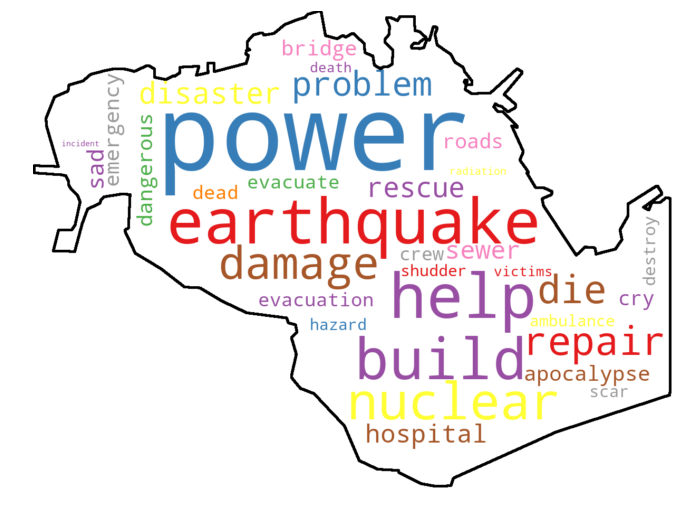

In [142]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotdlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def transform_format(val):
	if val == 0:
		return 255
	else:
		return val

wine_mask = np.array(Image.open("map_white.png"))
 
wordcloud = WordCloud(max_font_size=200, max_words=50, mode='RGB',
	mask=wine_mask,
	colormap=plt.cm.Set1,
                      collocations=False,
	contour_width=8, relative_scaling=.5,
	background_color="white").generate(list_palavras)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()

In [ ]:
data.loc["2020-04-06 19:40:00":"2020-04-06 20:40:00"]

In [ ]:
idx_data = []
loc_data = []
acc_data = []
msg_data = []
for idx, cor in data.iterrows():
    for word in p_usar:
        if word in cor.message:
            idx_data.append(idx)
            loc_data.append(cor.location)
            acc_data.append(cor.account)
            msg_data.append(cor.message)
            break

In [131]:
df_aux = pd.DataFrame(columns=["time","location","account","message"])
df_aux["time"] = idx_data
df_aux["location"] = loc_data
df_aux["account"] = acc_data
df_aux["message"] = msg_data
df_aux = df_aux.set_index("time")

In [132]:
df_aux.shape

(513, 3)

- Histograma con las palabras mas relevantes

In [133]:
edges2, hist2 = histogram(df_aux, "location", 100)

In [141]:
p2 = figure(plot_height=400, plot_width=800, title="Quantidade de tweets por intervalo de tempo",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime')

p2.xaxis.axis_label = "dias registrados"
p2.yaxis.axis_label = "quantidade de tweets"
source1 = ColumnDataSource(dict(hist=hist2,left=edges2[:-1], right=edges2[1:]))
p2.quad(top="hist", bottom=0, left="left", right="right", color = "blue", 
            line_color="white", alpha=1, source=source1, legend="tweets")
p2.hover.tooltips = [("data inicial", "@left{%F %T}"),
                    ("data final", "@right{%F %T}"),
                    ("quantidade", "@hist")]

p2.hover.formatters = {'left': 'datetime', 'right': 'datetime'}
p2.hover.mode = "vline"
show(p2)

In [ ]:
def normalizar_texto(df, words="", itvlo=False, d_init="", d_end=""):
    t_text = ""
    data_explorer = data.loc[data.location=="Broadview"].message
    for idx in data.message:
        t_text = t_text + " " + idx 

### Gráfico #2

In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, reset_output, curdoc
from bokeh.embed import file_html
from bokeh.models import LabelSet, Label, ColumnDataSource, FactorRange, HoverTool
from bokeh.models.annotations import Title
from bokeh.transform import factor_cmap
import bokeh.plotting as bp
from bokeh.layouts import row, column,layout, gridplot
from bokeh.models.widgets import Slider, TextInput, RangeSlider, Select, DateRangeSlider
from bokeh.transform import cumsum
from bokeh.palettes import Category10, Category20
import nltk

def histogram(df, col, bins=30):
    edges = []
    hist = []
    largura = max(df.index) - min(df.index)
    h = largura/bins
    aux = min(df.index)
    for i in range(100):
        edges.append(aux)
        hist.append(df.loc[aux:aux + h].count()[col])
        aux = aux + h
    edges.append(aux)
    
    return edges, hist

#Gráfico 1
p1 = figure(plot_height=400, plot_width=800, title="Distribuição dos tweets",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime')

#Gŕafico 2
p2 = figure(plot_height=800, plot_width=400, title="Palavras mais faladas", )